In [7]:
print("os module is part of Python standard library. Python version:", sys.version)


os module is part of Python standard library. Python version: 3.9.19 (main, Mar 21 2024, 17:21:27) [MSC v.1916 64 bit (AMD64)]


In [1]:
import tensorflow as tf
import keras
print(tf.test.is_built_with_cuda())
print(tf.__version__)
print(keras.__version__)

# Make sure the GPU is available.
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name == '':
    print('GPU device not found. TensorFlow is using CPU.')
else:
    print('Found GPU at: {}'.format(device_name))


print(tf.test.is_gpu_available())
tf.config.list_physical_devices('GPU')

import segmentation_models_3D as sm
from skimage import io
from patchify import patchify, unpatchify
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import file_utilities as fu

True
2.10.0
2.10.0
Found GPU at: /device:GPU:0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
Segmentation Models: using `keras` framework.


In [6]:
import pkg_resources

def get_installed_packages_versions():
    installed_packages = pkg_resources.working_set
    packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])
    return packages_list

packages_versions = get_installed_packages_versions()
for package in packages_versions:
    print(package)


absl-py==2.1.0
aggdraw==1.3.18.post0
alabaster==0.7.16
annotated-types==0.6.0
anyio==4.2.0
app-model==0.2.6
appdirs==1.4.4
archspec==0.2.3
argon2-cffi-bindings==21.2.0
argon2-cffi==21.3.0
asttokens==2.0.5
astunparse==1.6.3
async-lru==2.0.4
attrs==23.1.0
babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==4.1.0
boltons==24.0.0
brotli==1.0.9
build==1.2.1
cachetools==5.3.3
cachey==0.2.1
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==2.0.4
clang==5.0
classification-models-3d==1.0.8
click==8.1.7
cloudpickle==3.0.0
colorama==0.4.6
comm==0.2.1
conda-libmamba-solver==24.1.0
conda-package-handling==2.2.0
conda-package-streaming==0.9.0
conda==24.3.0
contourpy==1.2.1
cycler==0.12.1
dask==2024.4.2
debugpy==1.6.7
decorator==5.1.1
defusedxml==0.7.1
distro==1.9.0
docstring-parser==0.16
docutils==0.17.1
efficientnet-3d==1.0.1
exceptiongroup==1.2.0
executing==0.8.3
fastjsonschema==2.16.2
flatbuffers==24.3.25
fonttools==4.51.0
freetype-py==2.4.0
fsspec==2024.3.1
gast==0.4.0
g

In [2]:
import subprocess

def get_cuda_version():
    try:
        output = subprocess.check_output(['nvcc', '--version'])
        return output.decode('utf-8').strip()
    except FileNotFoundError:
        return "nvcc (CUDA) not found"

cuda_version = get_cuda_version()
print("CUDA Version:")
print(cuda_version)


CUDA Version:
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:41:10_Pacific_Daylight_Time_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [3]:
import os

def get_cudnn_version():
    try:
        cudnn_header_path = "/usr/local/cuda/include/cudnn.h"
        if os.path.isfile(cudnn_header_path):
            with open(cudnn_header_path, 'r') as f:
                for line in f:
                    if '#define CUDNN_MAJOR' in line:
                        major_version = line.split()[-1]
                    elif '#define CUDNN_MINOR' in line:
                        minor_version = line.split()[-1]
                    elif '#define CUDNN_PATCHLEVEL' in line:
                        patch_version = line.split()[-1]
                return f"cuDNN Version: {major_version}.{minor_version}.{patch_version}"
        else:
            return "cuDNN header file not found"
    except Exception as e:
        return str(e)

cudnn_version = get_cudnn_version()
print(cudnn_version)


cuDNN header file not found


In [24]:
# Get the file path
file_path = fu.choose_file()
image = io.imread(file_path)

# Get the file path
file_path = fu.choose_file()
mask = io.imread(file_path)
#mask_reduce = mask[0:16,:,:]
#mask_patches = patchify(mask, (64, 64, 64), step=64)  

Selected File: C:/Users/Ding-Yang/Desktop/internship/Try don't merge/better images/Unet/Preprocess image/section 2 740 TexRed Dextrans 3K dil 2 30 min CertnL 11.05.23/rm_bg.tiff
Selected File: C:/Users/Ding-Yang/Desktop/internship/Try don't merge/better images/Unet/GT/section 2 740 TexRed Dextrans 3K dil 2 30 min CertnL 11.05.23/label_wih_border_mask_3.tif


In [25]:
import os
import glob
import tifffile

def read_augmentation_images(original_image_path):
    # Get the current directory
    current_directory = os.getcwd()
    
    # Check if the 'Augmentation' directory exists
    augmentation_directory = os.path.join(current_directory, "Augmentation")
    if os.path.exists(augmentation_directory):
        # Get the directory path of the file
        file_directory = os.path.dirname(original_image_path)
        
        # Get the name of the last folder
        last_folder_name = os.path.basename(file_directory)

        # Check if the last_folder_name directory exists
        image_directory = os.path.join(augmentation_directory, last_folder_name, "image")
        mask_directory = os.path.join(augmentation_directory, last_folder_name, "mask")
        
        if os.path.exists(image_directory) and os.path.exists(mask_directory):
            # Read image files
            image_files = glob.glob(os.path.join(image_directory, "*.tif"))
            images = {os.path.splitext(os.path.basename(image_file))[0]: tifffile.imread(image_file) for image_file in image_files}

            # Read mask files
            mask_files = glob.glob(os.path.join(mask_directory, "*.tif"))
            masks = {os.path.splitext(os.path.basename(mask_file))[0]: tifffile.imread(mask_file) for mask_file in mask_files}
            
            if images and masks:
                print(f"Read {len(images)} images and {len(masks)} masks")
            else:
                print("Failed to read images and masks")
            return {"image": images, "mask": masks}
        else:
            print("Image or mask directory does not exist")
            return None
    else:
        print("Augmentation directory does not exist")
        return None

# Usage
result_dict = read_augmentation_images(file_path)


Read 1 images and 1 masks


In [26]:
def check_shapes(image_dict):
    # Initialize lists to store shapes and their corresponding keys
    image_shapes = []
    mask_shapes = []
    image_keys = []
    mask_keys = []

    # Iterate over the items in the dictionary
    for key, sub_dict in image_dict.items():
        for sub_key, value in sub_dict.items():
            if 'image' in sub_key.lower():
                image_shapes.append(value.shape)
                image_keys.append(sub_key)
            elif 'mask' in sub_key.lower():
                mask_shapes.append(value.shape)
                mask_keys.append(sub_key)

    # Check if all image shapes are the same
    same_image_shapes = all(shape == image_shapes[0] for shape in image_shapes)

    # Check if all mask shapes are the same
    same_mask_shapes = all(shape == mask_shapes[0] for shape in mask_shapes)

    if same_image_shapes:
        print("All images have the same shape:", image_shapes[0])
    else:
        print("Images have different shapes. All images must have the same shape")
        for i, shape in enumerate(image_shapes):
            if shape != image_shapes[0]:
                raise ValueError(f"Image {image_keys[i]} has shape:", shape)

    if same_mask_shapes:
        print("All masks have the same shape:", mask_shapes[0])
    else:
        print("Masks have different shapes. All masks must have the same shape")
        for i, shape in enumerate(mask_shapes):
            if shape != mask_shapes[0]:
                raise ValueError(f"Mask {mask_keys[i]} has shape:", shape)

    if image_shapes[0] == mask_shapes[0]:
        print("All images and masks have same shapes", mask_shapes[0])
        return image_shapes[0]
    else:
        raise ValueError("Images and masks have different shapes")

# Usage
image_shape = check_shapes(result_dict)


All images have the same shape: (17, 1024, 1024)
All masks have the same shape: (17, 1024, 1024)
All images and masks have same shapes (17, 1024, 1024)


In [27]:
image_keys = list(result_dict['image'].keys())
mask_keys = list(result_dict['mask'].keys())

# 找到匹配的键对
matched_pairs = [(image_key, mask_key) for image_key in image_keys for mask_key in mask_keys if image_key.split(' ')[0] == mask_key.split(' ')[0]]

# 打印匹配的键对
for i, (image_key, mask_key) in enumerate(matched_pairs):
    print("image:", i)
    print("Image key:", image_key)
    print("Mask key:", mask_key)

    print()


image: 0
Image key: RandomGamma_RandomFlip_transpose 0 Image
Mask key: RandomGamma_RandomFlip_transpose 0 Mask



# doubke the size

In [28]:
import numpy as np
import math

def adjust_image_size(result_dict, z_target = None):
    # Get the shape of the images
    image_shapes = check_shapes(result_dict)
    if len(result_dict['image']) != len(result_dict['mask']):
        raise ValueError("Your image and mask couldn't match")

    # Get the shape of the images
    oz, ox, oy = image_shapes
    if z_target == None:
        z_target = round(oz / 32) * 32
        print(f"Adjusting your result_dict image shape from {image_shapes} into {(z_target, ox, oy)}...")
    else:        
        # Check if z_target is divisible by 32
        if z_target % 32 != 0:
            raise ValueError("z_target must be divisible by 32")

    # make adjusted_result dic
    adjusted_result = {'image': {}, 'mask': {}}
    num_images = len(result_dict['image'])
    num_adjusted_images = len(result_dict['image'])
    for i in range(num_adjusted_images):
        adjusted_image_key = f"image {i+1}"
        adjusted_mask_key = f"mask {i+1}"
        adjusted_result['image'][adjusted_image_key] = np.zeros((z_target, ox, oy), dtype=result_dict['image'][list(result_dict['image'].keys())[i]].dtype)
        adjusted_result['mask'][adjusted_mask_key] = np.zeros((z_target, ox, oy), dtype=result_dict['mask'][list(result_dict['mask'].keys())[i]].dtype)

    # Check if z_target is higher or lower than the current z
    if oz > z_target:
        # Higher, crop the images
        image_keys = list(result_dict['image'].keys())
        mask_keys = list(result_dict['mask'].keys())
        
        # 找到匹配的键对
        matched_pairs = [(image_key, mask_key) for image_key in image_keys for mask_key in mask_keys if image_key.split(' ')[0] == mask_key.split(' ')[0]]
        
        # 打印匹配的键对count, value in enumerate(values
        for i, (image_key, mask_key) in enumerate(matched_pairs):
            key_adjust_image = list(adjusted_result['image'].keys())[i]
            adjusted_result["image"][key_adjust_image] = np.copy(result_dict['image'][image_key][0:z_target])

            key_adjust_mask = list(adjusted_result['mask'].keys())[i]
            adjusted_result["mask"][key_adjust_mask] = np.copy(result_dict['mask'][mask_key][0:z_target])


    elif oz < z_target:
        # Lower, pad the images
        # Higher, crop the images
        image_keys = list(result_dict['image'].keys())
        mask_keys = list(result_dict['mask'].keys())
        
        # 找到匹配的键对
        matched_pairs = [(image_key, mask_key) for image_key in image_keys for mask_key in mask_keys if image_key.split(' ')[0] == mask_key.split(' ')[0]]
        
        # 打印匹配的键对count, value in enumerate(values
        for i, (image_key, mask_key) in enumerate(matched_pairs):
            key_adjust_image = list(adjusted_result['image'].keys())[i]
            adjusted_result["image"][key_adjust_image][0:oz] = np.copy(result_dict['image'][image_key])
            adjusted_result["image"][key_adjust_image][oz:z_target] = np.copy(result_dict['image'][image_key][0:z_target - oz])


            key_adjust_mask = list(adjusted_result['mask'].keys())[i]
            adjusted_result["mask"][key_adjust_mask][0:oz] = np.copy(result_dict['mask'][mask_key])
            adjusted_result["mask"][key_adjust_mask][oz:z_target] = np.copy(result_dict['mask'][mask_key][0:z_target - oz])
    else:
        print("Your z_target has the same size as the original of the image. The images do not change.")
        adjusted_result = result_dict
    print("Finish!")
    return adjusted_result

# Usage
adjusted_result = adjust_image_size(result_dict)


All images have the same shape: (17, 1024, 1024)
All masks have the same shape: (17, 1024, 1024)
All images and masks have same shapes (17, 1024, 1024)
Adjusting your result_dict image shape from (17, 1024, 1024) into (32, 1024, 1024)...
Finish!


In [29]:
adjusted_result['image']['image 1'].shape

(32, 1024, 1024)

In [30]:
z, _, _ = adjusted_result['image']['image 1'].shape
reszie_image = np.zeros((z, 1024, 1024))
reszie_mask = np.zeros((z, 1024, 1024))

if image.shape[0] <= z:
    reszie_image[0:image.shape[0]] = image
    reszie_image[image.shape[0]:z] = image[0:z-image.shape[0]]
    reszie_mask[0:image.shape[0]] = mask
    reszie_mask[image.shape[0]:z] = mask[0:z-mask.shape[0]]
else:
    reszie_image = image[0:z]
    reszie_mask = mask[0:z]

image = reszie_image

mask = reszie_mask

In [44]:
from patchify import patchify, unpatchify
img_patches = patchify(image, (32, 64, 64), step=64)  #Step=64 for 64 patches means no overlap
mask_patches = patchify(mask, (32, 64, 64), step=64)  
print(img_patches.shape,mask_patches.shape)

image_dataset = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
mask_dataset = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))

print(image_dataset.shape)  # n_patches, x, y, z

(1, 16, 16, 32, 64, 64) (1, 16, 16, 32, 64, 64)
(256, 32, 64, 64)


In [45]:
image_keys = list(adjusted_result['image'].keys())
mask_keys = list(adjusted_result['mask'].keys())
matched_pairs = [(image_keys[i], mask_keys[i]) for i in range(min(len(image_keys), len(mask_keys)))]
for i, (image_key, mask_key) in enumerate(matched_pairs):
    print(f"patching image {i+1}")
    img_patches = patchify(adjusted_result['image'][image_key], (32, 64, 64), step=64)  #Step=64 for 64 patches means no overlap
    mask_patches = patchify(adjusted_result['mask'][mask_key], (32, 64, 64), step=64)  
    input_img = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
    input_mask = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))
    image_dataset = np.concatenate([image_dataset, input_img], axis=0)
    mask_dataset = np.concatenate([mask_dataset, input_mask], axis=0)


patching image 1


# Two image data

In [46]:
image_dataset.shape

(512, 32, 64, 64)

In [23]:
image_dataset_1 = np.copy(image_dataset)
mask_dataset_1 = np.copy(mask_dataset)

In [39]:
image_dataset = np.concatenate(image_dataset_1, axis=1)
mask_dataset =np.concatenate(mask_dataset_1, axis=0)
image_dataset.shape

(32, 32768, 64)

In [48]:

# 将两个数组沿着第一个轴合并
merged_image = np.concatenate((image_dataset_1, image_dataset), axis=0)
merged_mask = np.concatenate((mask_dataset_1, mask_dataset), axis=0)

# 打印合并后的数组形状
print(merged_image.shape)


(1024, 32, 64, 64)


In [49]:
image_dataset = np.copy(merged_image)
mask_dataset =np.copy(merged_mask)
image_dataset.shape

(1024, 32, 64, 64)

# merge 2 image into 1


In [11]:

double_the_size_image = np.zeros((32, 1024, 1024),  dtype= image.dtype)
double_the_size_image[0:17] = image
double_the_size_image[17:32] = result_dict['image'][matched_pairs[0][0]][:15]
image = double_the_size_image


double_the_size_mask = np.zeros((32, 1024, 1024), dtype= image.dtype)
double_the_size_mask[0:17] = mask
double_the_size_mask[17:32] = result_dict['mask'][matched_pairs[0][1]][:15]
mask = double_the_size_mask


In [ ]:
from patchify import patchify, unpatchify
img_patches = patchify(image, (32, 64, 64), step=64)  #Step=64 for 64 patches means no overlap
mask_patches = patchify(mask, (32, 64, 64), step=64)  
print(img_patches.shape,mask_patches.shape)

image_dataset = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
mask_dataset = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))

print(image_dataset.shape)  # n_patches, x, y, z

In [ ]:

for i in range(1, len(result_dict['image']),2):
    double_the_size_image = np.zeros((32, 1024, 1024),  dtype= image.dtype)
    double_the_size_image[0:17] = result_dict['image'][matched_pairs[i][0]]
    double_the_size_image[17:32] = result_dict['image'][matched_pairs[i+1][0]][:15]
    image = double_the_size_image
    
    
    double_the_size_mask = np.zeros((32, 1024, 1024), dtype= image.dtype)
    double_the_size_mask[0:17] = result_dict['mask'][matched_pairs[i][1]]
    double_the_size_mask[17:32] = result_dict['mask'][matched_pairs[i+1][1]][:15]
    mask = double_the_size_mask

    print(f"patching image {i+1}")
    img_patches = patchify(image, (32, 64, 64), step=64)  #Step=64 for 64 patches means no overlap
    mask_patches = patchify(mask, (32, 64, 64), step=64)  
    
    input_img = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
    input_mask = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))
    image_dataset = np.concatenate([image_dataset, input_img], axis=0)
    mask_dataset = np.concatenate([mask_dataset, input_mask], axis=0)

# Patchify

(1024, 32, 64, 64) (1024, 32, 64, 64)
213


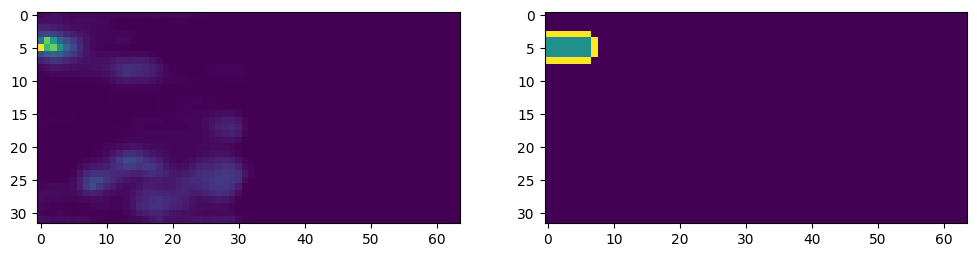

In [51]:
#Sanity check, view few mages
import random
import numpy as np
print(image_dataset.shape, mask_dataset.shape)
image_number = random.randint(0, len(image_dataset))
print(image_number)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number,:,:,28])
plt.subplot(122)
plt.imshow(mask_dataset[image_number,:,:,28])
plt.show()

In [52]:
mask_dataset = mask_dataset.astype(np.uint8)
np.unique(mask_dataset)


array([0, 1, 2], dtype=uint8)

In [53]:
image_dataset.shape

(1024, 32, 64, 64)

In [54]:
train_img = np.stack((image_dataset,)*3, axis=-1)
train_mask = np.expand_dims(mask_dataset, axis=-1)


In [55]:
import numpy as np

# 創建一個NumPy陣列

# 儲存陣列
np.save('./train_img.npy', train_img)
np.save('./train_mask.npy', train_mask)

In [56]:
n_classes=3# background, border, axons
from keras.utils import to_categorical

train_mask_cat = to_categorical(train_mask, num_classes=n_classes)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_img, train_mask_cat, test_size = 0.1, random_state = 0)
np.save('./X_train.npy', X_train)
np.save('./X_test.npy', X_test)
np.save('./y_train.npy', y_train)
np.save('./y_test.npy', y_test)


In [1]:
import tensorflow as tf
import keras
print(tf.test.is_built_with_cuda())
print(tf.__version__)
print(keras.__version__)

# Make sure the GPU is available.
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name == '':
    print('GPU device not found. TensorFlow is using CPU.')
else:
    print('Found GPU at: {}'.format(device_name))


print(tf.test.is_gpu_available())
tf.config.list_physical_devices('GPU')

import segmentation_models_3D as sm
metrics = [sm.metrics.IOUScore(threshold=0.5)]
from skimage import io
from patchify import patchify, unpatchify
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import file_utilities as fu

True
2.10.0
2.10.0
Found GPU at: /device:GPU:0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
Segmentation Models: using `keras` framework.


In [15]:
import numpy as np
train_img = np.load('./train_img.npy')
train_mask = np.load('./train_mask.npy')

train_mask.shape

(1024, 32, 64, 64, 1)

(1024, 32, 64, 64, 3) (1024, 32, 64, 64, 1)
795


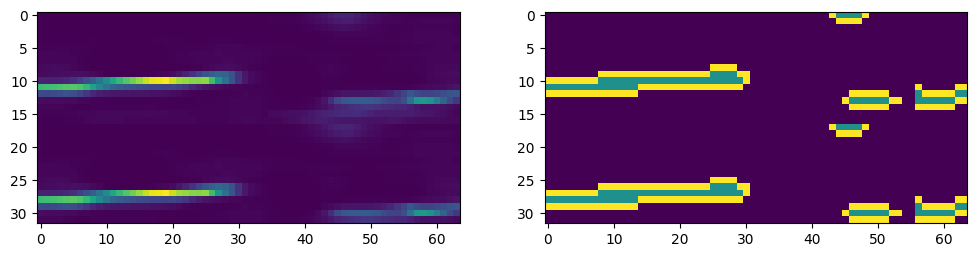

In [27]:
#Sanity check, view few mages
import random
import numpy as np
print(train_img.shape, train_mask.shape)
image_number = random.randint(0, len(train_img))
print(image_number)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(train_img[image_number,:,:,28,1])
plt.subplot(122)
plt.imshow(train_mask[image_number,:,:,28,0])
plt.show()

In [32]:
X_train = np.load('./X_train.npy')
X_test = np.load('./X_test.npy')
y_train = np.load('./y_train.npy')
y_test = np.load('./y_test.npy')


(921, 32, 64, 64, 3) (921, 32, 64, 64, 3)
198


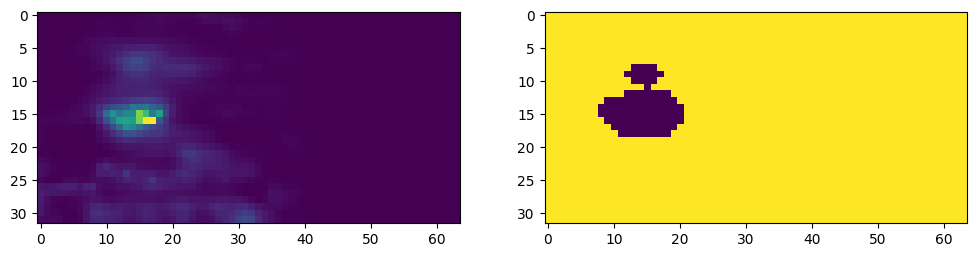

In [32]:
#Sanity check, view few mages
import random
import numpy as np
print(X_train.shape, y_train.shape)
image_number = random.randint(0, len(X_train))
print(image_number)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,28,1])
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,28,0])
plt.show()

In [22]:
#Define parameters for our model.

encoder_weights = 'imagenet'
BACKBONE = 'vgg16'  #Try vgg16, efficientnetb7, inceptionv3, resnet50
activation = 'softmax'
n_classes = 3
channels=3

LR = 0.0001
optim = tf.keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss (car: 1.; pedestrian: 2.; background: 0.5;)
dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.333, 0.333, 0.333])) #优点：对于不平衡的数据集和像素级别的分割任务效果较好，能够更好地处理类别间的不平衡。缺点：对噪声敏感，容易受到边缘效应的影响。
focal_loss = sm.losses.CategoricalFocalLoss()#优点：能够解决类别不平衡问题，通过调节alpha和gamma参数可以进一步调整损失函数的重点。缺点：需要调节额外的参数，可能需要进行一定的调参工作。
#jaccard_loss = sm.losses.JaccardLoss() #优点：度量了预测和标签之间的相似度，对于不平衡的数据集效果较好。缺点：对于像素级别的分割任务可能存在不连续性，需要额外处理。

total_loss = dice_loss + (1 * focal_loss)


# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5)]

In [27]:
preprocess_input = sm.get_preprocessing(BACKBONE)

In [28]:
#Preprocess input data - otherwise you end up with garbage resutls 
# and potentially model that does not converge.
X_train_prep = preprocess_input(X_train)
X_test_prep = preprocess_input(X_test)

In [30]:
X_train_prep.shape

(604, 32, 64, 64, 3)

In [7]:

#Define the model. Here we use Unet but we can also use other model architectures from the library.
model = sm.Unet(BACKBONE, classes=n_classes, 
                input_shape=(32, 64, 64, channels), 
                encoder_weights=encoder_weights,
                activation='softmax')

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping

#early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights = False)
model_checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_loss', save_best_only=True)

callbacks=[#early_stopping,
           model_checkpoint,
                  CSVLogger('./history_au.csv'),
            ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10)
          ]

In [12]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 64, 64,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv3D)          (None, 32, 64, 64,   5248        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv3D)          (None, 32, 64, 64,   110656      ['block1_conv1[0][0]']           
                                64)                                                           

In [10]:
#Fit the model
history=model.fit(X_train_prep, 
                  y_train,
                  batch_size=2, 
                  epochs=500,
                  validation_data=(X_test_prep,y_test),
                  callbacks=callbacks)

Epoch 1/500
461/461 [==============================] - 61s 124ms/step - loss: 1.4380 - iou_score: 0.4510 - val_loss: 1.4477 - val_iou_score: 0.5941 - lr: 1.0000e-04
Epoch 2/500
461/461 [==============================] - 55s 120ms/step - loss: 1.3280 - iou_score: 0.5257 - val_loss: 1.3752 - val_iou_score: 0.6021 - lr: 1.0000e-04
Epoch 3/500
461/461 [==============================] - 55s 119ms/step - loss: 1.2982 - iou_score: 0.5542 - val_loss: 1.4189 - val_iou_score: 0.5517 - lr: 1.0000e-04
Epoch 4/500
461/461 [==============================] - 55s 119ms/step - loss: 1.2747 - iou_score: 0.5835 - val_loss: 2.0110 - val_iou_score: 0.1235 - lr: 1.0000e-04
Epoch 5/500
461/461 [==============================] - 56s 121ms/step - loss: 1.2616 - iou_score: 0.5780 - val_loss: 1.3263 - val_iou_score: 0.6410 - lr: 1.0000e-04
Epoch 6/500
461/461 [==============================] - 55s 119ms/step - loss: 1.2586 - iou_score: 0.5851 - val_loss: 1.3369 - val_iou_score: 0.6263 - lr: 1.0000e-04
Epoch 7/50

# evaluation
you coudl restart the kernal

   epoch  iou_score      loss  val_iou_score  val_loss
0      0   0.516524  0.874117       0.543803  0.858128
1      1   0.563098  0.845399       0.563565  0.840985
2      2   0.576101  0.828242       0.581308  0.820235
3      3   0.583522  0.814971       0.585522  0.808931
4      4   0.592286  0.803876       0.591929  0.798005


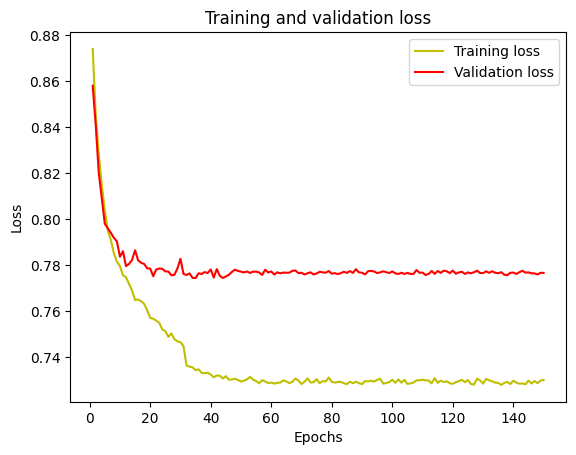

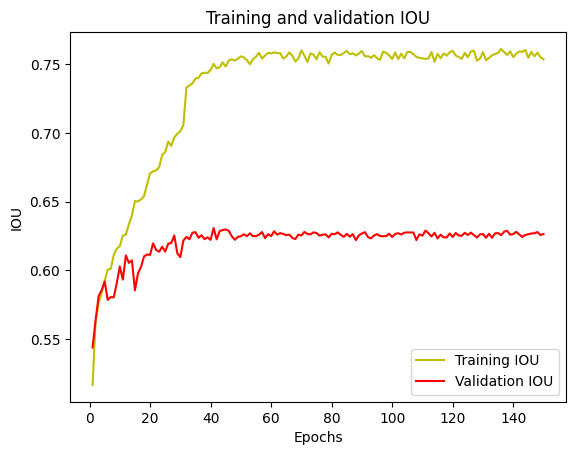

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# 读取 CSV 文件
history_df = pd.read_csv('./history_au.csv')

# 查看数据结构
print(history_df.head())

# 绘制训练和验证损失
loss = history_df['loss']
val_loss = history_df['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('./loss_plot.png', bbox_inches='tight')  # Save the plot as PNG image
plt.show()

# 绘制训练和验证 IOU
iou = history_df['iou_score']
val_iou = history_df['val_iou_score']
plt.plot(epochs, iou, 'y', label='Training IOU')
plt.plot(epochs, val_iou, 'r', label='Validation IOU')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.savefig('./iou_plot.png', bbox_inches='tight')  # Save the plot as PNG image
plt.show()


In [2]:
import tensorflow as tf
import keras
print(tf.test.is_built_with_cuda())
print(tf.__version__)
print(keras.__version__)

# Make sure the GPU is available.
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name == '':
    print('GPU device not found. TensorFlow is using CPU.')
else:
    print('Found GPU at: {}'.format(device_name))


print(tf.test.is_gpu_available())
tf.config.list_physical_devices('GPU')

import segmentation_models_3D as sm
from skimage import io
from patchify import patchify, unpatchify
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import file_utilities as fu

True
2.10.0
2.10.0
Found GPU at: /device:GPU:0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
Segmentation Models: using `keras` framework.


In [3]:
import numpy as np
train_img = np.load('./train_img.npy')
train_mask = np.load('./train_mask.npy')

train_mask.shape

(1024, 32, 64, 64, 1)

In [4]:
n_classes=3# background, border, axons
from keras.utils import to_categorical

train_mask_cat = to_categorical(train_mask, num_classes=n_classes)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_img, train_mask_cat, test_size = 0.20, random_state = 0)

In [4]:
X_train = np.load('./X_train.npy')
X_test = np.load('./X_test.npy')
y_train = np.load('./y_train.npy')
y_test = np.load('./y_test.npy')


In [5]:
#Define parameters for our model.
BACKBONE = 'vgg16'  #Try vgg16, efficientnetb7, inceptionv3, resnet50
LR = 0.0001
optim = tf.keras.optimizers.Adam(LR)

dice_loss = sm.losses.DiceLoss(class_weights=np.array([0.333, 0.333, 0.333])) #优点：对于不平衡的数据集和像素级别的分割任务效果较好，能够更好地处理类别间的不平衡。缺点：对噪声敏感，容易受到边缘效应的影响。
focal_loss = sm.losses.CategoricalFocalLoss()#优点：能够解决类别不平衡问题，通过调节alpha和gamma参数可以进一步调整损失函数的重点。缺点：需要调节额外的参数，可能需要进行一定的调参工作。
jaccard_loss = sm.losses.JaccardLoss() #优点：度量了预测和标签之间的相似度，对于不平衡的数据集效果较好。缺点：对于像素级别的分割任务可能存在不连续性，需要额外处理。

total_loss = dice_loss + (1 * focal_loss) + jaccard_loss
metrics = [sm.metrics.IOUScore(threshold=0.5)]


from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights = False)
model_checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_loss', save_best_only=True)

callbacks=[early_stopping, model_checkpoint,
                  CSVLogger('./history_au.csv'),
            ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=20)
          ]

In [6]:
#Preprocess input data - otherwise you end up with garbage resutls 
# and potentially model that does not converge.

preprocess_input = sm.get_preprocessing(BACKBONE)


X_train_prep = preprocess_input(X_train)
X_test_prep = preprocess_input(X_test)


In [7]:
#Load the pretrained model for testing and predictions. 
from keras.models import load_model
def dice_loss_plus_1focal_loss_plus_jaccard_loss(y_true, y_pred):
    total_loss
    pass
def iou_score(y_true, y_pred):
    metrics    
    pass
model = load_model('./best_model.h5',custom_objects={'dice_loss_plus_1focal_loss_plus_jaccard_loss': dice_loss_plus_1focal_loss_plus_jaccard_loss, 'iou_score': iou_score})
model.compile(optimizer=optim, loss=total_loss, metrics=metrics)

#If you load a different model do not forget to preprocess accordingly. 

In [5]:
from keras.models import load_model
#Load the pretrained model for testing and predictions. 
model = load_model('./best_model.h5',compile = False)

7/7 [==============================] - 18s 2s/step
[[0.98593642 0.00687866 0.00718492]
 [0.06428356 0.8507551  0.08496134]
 [0.22136796 0.12807615 0.65055588]]


<Figure size 800x600 with 0 Axes>

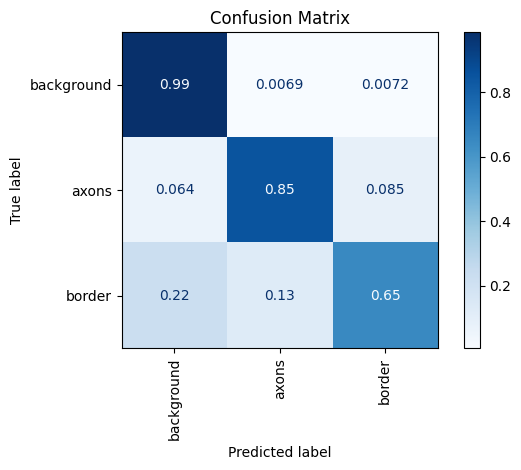

              precision    recall  f1-score   support

           0       0.99      0.99      0.99  25716502
           1       0.71      0.85      0.78    692821
           2       0.55      0.65      0.60    460437

    accuracy                           0.98  26869760
   macro avg       0.75      0.83      0.79  26869760
weighted avg       0.98      0.98      0.98  26869760

IoU: 0.67690855


In [7]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from keras.metrics import MeanIoU
import numpy as np


# 假設 predictions 是模型的預測結果
predictions = model.predict(X_test_prep)
predictions = np.argmax(predictions, axis=-1)  # 從概率到類別索引

# 真實標籤需要與預測相同的處理
true_labels = np.argmax(y_test, axis=-1)
plt.figure(figsize=(8, 6))
# 混淆矩陣
class_labels = ['background', 'axons', 'border']
cm = confusion_matrix(true_labels.flatten(), predictions.flatten(), normalize="true")
print(cm)
ConfusionMatrixDisplay(cm, display_labels = class_labels).plot(
    include_values=True, cmap=plt.cm.Blues, xticks_rotation="vertical"
)
plt.title("Confusion Matrix")
plt.savefig('./confusion_matrix.png', bbox_inches='tight')  # Save the plot as PNG image
plt.tight_layout()
plt.show()

# 分類報告
print(classification_report(true_labels.flatten(), predictions.flatten()))

# 計算IoU
num_classes = len(np.unique(true_labels))  # 假設的類別數量
iou = MeanIoU(num_classes=num_classes)
iou.update_state(true_labels, predictions)
print("IoU:", iou.result().numpy())


In [8]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=4)
y_test_argmax = np.argmax(y_test, axis=4)


7/7 [==============================] - 14s 2s/step


In [9]:
print(y_pred_argmax.shape)
print(y_test_argmax.shape)
print(np.unique(y_pred_argmax))

(205, 32, 64, 64)
(205, 32, 64, 64)
[0 1 2]


In [11]:
#Test some random images
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]

test_img_input=np.expand_dims(test_img, 0)
#test_img_input1 = preprocess_input(test_img_input)

test_pred1 = model.predict(test_img_input)
test_prediction1 = np.argmax(test_pred1, axis=4)[0,:,:,:]
print(test_prediction1.shape)




1/1 [==============================] - 0s 490ms/step
(32, 64, 64)


In [12]:
ground_truth_argmax = np.argmax(ground_truth, axis=3)
print(test_img.shape)

(32, 64, 64, 3)


28


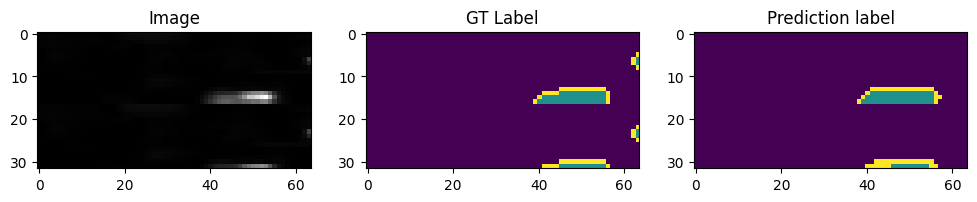

28

In [19]:
#Plot individual slices from test predictions for verification
slice = random.randint(0, test_img.shape[2])
print(slice)
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Image')
plt.imshow(test_img[:,:,slice,0], cmap='gray')
plt.subplot(232)
plt.title('GT Label')
plt.imshow(ground_truth_argmax[:,:,slice])
plt.subplot(233)
plt.title('Prediction label')
plt.imshow(test_prediction1[:,:,slice])
plt.show()
slice